In [1]:
import re
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

def get_len(info_comp):
    return len(info_comp)

def get_evil_char(info_comp):
    return len(re.findall("[<>\"\'=&{}!#\*]", info_comp, re.IGNORECASE))

def get_evil_word(info_comp):
    return len(re.findall("(alert)|(script)|(XSS)|(SRC=)|(xss)|(onerror)|(onload)|(BODY)|(src=)|(INPUT)|(http)|(LINK)|(url=)|(SCRIPT)",info_comp,re.IGNORECASE))

def get_feature(info_comp):
    return [get_len(info_comp),get_evil_char(info_comp),get_evil_word(info_comp)]

In [2]:
import pandas as pd #数据分析
import numpy as np #科学计算
from pandas import Series,DataFrame
data_logs = pd.read_csv("logxss3.csv",encoding = 'latin1')
data_logs=data_logs.ix[:,1:]
data_logs

,ip,date,hour,minute,seconds,zone,request1,request2,status,respsize,attaque
0,192.108.116.88,18/Dec/2017,13,0,31,0,GET,HTTP/1.1/NA/datalab ';alert(String.fromCharCo...,200.0,1040.0,1
1,192.108.116.88,18/Dec/2017,13,0,31,0,GET,css/index.css HTTP/1.1/datalab ';alert(String....,200.0,945.0,1
2,192.108.116.88,18/Dec/2017,13,0,31,0,GET,img/logo.png HTTP/1.1/datalab ';alert(String.f...,200.0,34463.0,1
3,192.108.116.88,18/Dec/2017,13,2,31,0,POST,datalab HTTP/1.1/NA/datalab ';alert(String.fro...,NaN,NaN,1
4,192.108.116.88,18/Dec/2017,13,4,31,0,POST,datalab HTTP/1.1/NA/datalab ';alert(String.fro...,NaN,NaN,1
5,192.108.116.88,18/Dec/2017,13,4,56,0,GET,"HTTP/1.1/NA/datalab '';!--""<XSS>=&{()}",200.0,1040.0,1
6,192.108.116.88,18/Dec/2017,13,4,56,0,GET,"css/index.css HTTP/1.1/datalab '';!--""<XSS>=&{...",200.0,945.0,1
7,192.108.116.88,18/Dec/2017,13,4,56,0,GET,"img/logo.png HTTP/1.1/datalab '';!--""<XSS>=&{()}",200.0,34463.0,1
8,192.108.116.88,18/Dec/2017,13,4,57,0,POST,"datalab HTTP/1.1/NA/datalab '';!--""<XSS>=&{()}",200.0,1073.0,1
9,192.108.116.88,18/Dec/2017,13,4,57,0,GET,"css/index.css HTTP/1.1/datalab '';!--""<XSS>=&{...",304.0,NaN,1


In [4]:
data_logs[data_logs['attaque']==1]

,ip,date,hour,minute,seconds,zone,request1,request2,status,respsize,attaque
0,192.108.116.88,18/Dec/2017,13,0,31,0,GET,HTTP/1.1/NA/datalab ';alert(String.fromCharCo...,200.0,1040.0,1
1,192.108.116.88,18/Dec/2017,13,0,31,0,GET,css/index.css HTTP/1.1/datalab ';alert(String....,200.0,945.0,1
2,192.108.116.88,18/Dec/2017,13,0,31,0,GET,img/logo.png HTTP/1.1/datalab ';alert(String.f...,200.0,34463.0,1
3,192.108.116.88,18/Dec/2017,13,2,31,0,POST,datalab HTTP/1.1/NA/datalab ';alert(String.fro...,NaN,NaN,1
4,192.108.116.88,18/Dec/2017,13,4,31,0,POST,datalab HTTP/1.1/NA/datalab ';alert(String.fro...,NaN,NaN,1
5,192.108.116.88,18/Dec/2017,13,4,56,0,GET,"HTTP/1.1/NA/datalab '';!--""<XSS>=&{()}",200.0,1040.0,1
6,192.108.116.88,18/Dec/2017,13,4,56,0,GET,"css/index.css HTTP/1.1/datalab '';!--""<XSS>=&{...",200.0,945.0,1
7,192.108.116.88,18/Dec/2017,13,4,56,0,GET,"img/logo.png HTTP/1.1/datalab '';!--""<XSS>=&{()}",200.0,34463.0,1
8,192.108.116.88,18/Dec/2017,13,4,57,0,POST,"datalab HTTP/1.1/NA/datalab '';!--""<XSS>=&{()}",200.0,1073.0,1
9,192.108.116.88,18/Dec/2017,13,4,57,0,GET,"css/index.css HTTP/1.1/datalab '';!--""<XSS>=&{...",304.0,NaN,1


In [4]:
x=[]
for line in data_logs.request2.values:
    f1=get_len(line)
    f2=get_evil_char(line)
    f3=get_evil_word(line)
    x.append([f1,f2,f3])
print(x)

[[251, 15, 9], [261, 15, 9], [260, 15, 9], [258, 15, 9], [258, 15, 9], [40, 10, 2], [50, 10, 2], [49, 10, 2], [47, 10, 2], [50, 10, 2], [49, 10, 2], [99, 7, 3], [109, 7, 3], [108, 7, 3], [106, 7, 3], [108, 7, 3], [109, 7, 3], [48, 3, 4], [58, 3, 4], [57, 3, 4], [55, 3, 4], [58, 3, 4], [57, 3, 4], [47, 3, 2], [57, 3, 2], [56, 3, 2], [54, 3, 2], [57, 3, 2], [56, 3, 2], [52, 3, 3], [62, 3, 3], [61, 3, 3], [59, 3, 3], [62, 3, 3], [61, 3, 3], [57, 3, 2], [67, 3, 2], [66, 3, 2], [64, 3, 2], [66, 3, 2], [67, 3, 2], [70, 5, 6], [80, 5, 6], [79, 5, 6], [77, 5, 6], [80, 5, 6], [79, 5, 6], [58, 7, 5], [68, 7, 5], [67, 7, 5], [65, 7, 5], [65, 7, 5], [55, 5, 5], [65, 5, 5], [64, 5, 5], [62, 5, 5], [62, 5, 5], [58, 7, 5], [68, 7, 5], [67, 7, 5], [65, 7, 5], [65, 7, 5], [55, 5, 5], [65, 5, 5], [64, 5, 5], [62, 5, 5], [62, 5, 5], [55, 5, 5], [65, 5, 5], [64, 5, 5], [62, 5, 5], [62, 5, 5], [55, 5, 5], [65, 5, 5], [64, 5, 5], [62, 5, 5], [65, 5, 5], [64, 5, 5], [72, 7, 5], [82, 7, 5], [81, 7, 5], [79, 7

In [12]:
y=data_logs.attaque.values
print(y)

[1 1 1 ..., 0 0 0]


In [13]:
from sklearn import metrics
def do_metrics(y_test,y_pred):
    print ("metrics.accuracy_score:")
    print (metrics.accuracy_score(y_test, y_pred))
    print ("metrics.confusion_matrix:")
    print (metrics.confusion_matrix(y_test, y_pred))
    print ("metrics.precision_score:")
    print (metrics.precision_score(y_test, y_pred))
    print ("metrics.recall_score:")
    print (metrics.recall_score(y_test, y_pred))
    print ("metrics.f1_score:")
    print (metrics.f1_score(y_test,y_pred))

In [14]:
from sklearn import cross_validation
from sklearn import datasets
from sklearn import svm
from sklearn.externals import  joblib
import matplotlib.pyplot as plt
x_train, x_test, y_train, y_test = cross_validation.train_test_split(x,y, test_size=0.4, random_state=0)
clf = svm.SVC(kernel='linear', C=1).fit(x_train, y_train)
y_pred = clf.predict(x_test)
do_metrics(y_test, y_pred)

metrics.accuracy_score:
0.999093381686
metrics.confusion_matrix:
[[3047    3]
 [   0  259]]
metrics.precision_score:
0.988549618321
metrics.recall_score:
1.0
metrics.f1_score:
0.99424184261


Confusion Matrix Stats
no attaque/no attaque: 99.90% (3047/3050)
no attaque/attaque: 0.10% (3/3050)
attaque/no attaque: 0.00% (0/259)
attaque/attaque: 100.00% (259/259)


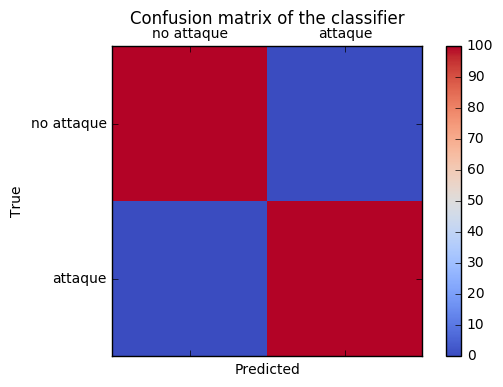

In [17]:
labels = ['no attaque', 'attaque']
cm = metrics.confusion_matrix(y_test, y_pred)

def plot_cm(cm, labels):
    
    # Compute percentanges
    percent = (cm*100.0)/np.array(np.matrix(cm.sum(axis=1)).T)  # Derp, I'm sure there's a better way
    
    print ('Confusion Matrix Stats')
    for i, label_i in enumerate(labels):
        for j, label_j in enumerate(labels):
            print ("%s/%s: %.2f%% (%d/%d)" % (label_i, label_j, (percent[i][j]), cm[i][j], cm[i].sum()))

    # Show confusion matrix
    # Thanks kermit666 from stackoverflow :)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.grid(b=False)
    cax = ax.matshow(percent, cmap='coolwarm')
    plt.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

plot_cm(cm, labels)